$ \text{RSD} = \pm 2^{(1-0.5\log{\text{C}})}$

In [1]:
import numpy as np

C = [10**e for e in np.arange(0, -13, -0.01)]

RSD = 2**(1-0.5*np.log10(C))

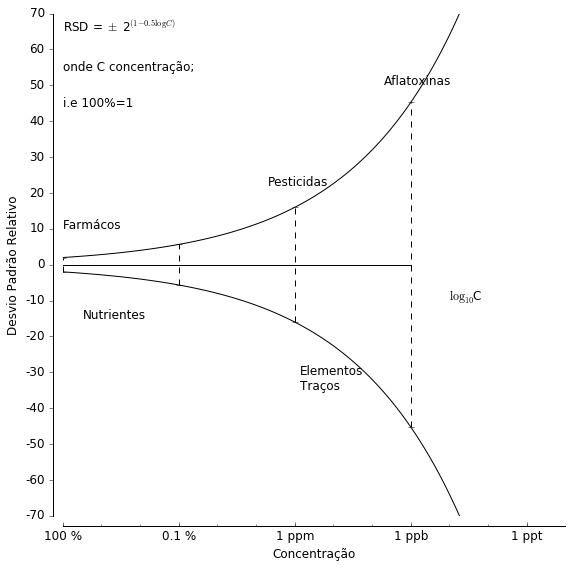

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import rcParams

rcParams['ytick.direction'] = 'out'
rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(9, 9))
ax.semilogx(C, RSD, 'k')
ax.semilogx(C, -RSD, 'k')
ax.invert_xaxis()
ax.set_ylim(-70, 70)

# y-ticklabels.
yticks = list(range(-70, 80, 10))
ax.set_yticks(yticks)
ax.set_yticklabels(['{}'.format(y) for y in yticks])

# x-ticklabels.
xticks = [1e0, 1e-3, 1e-6, 1e-9, 1e-12]
ax.set_xticks(xticks)
ax.set_xticklabels(['100 %', '0.1 %', '1 ppm', '1 ppb', '1 ppt'])

# Fancy spines.
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# "Errorbar."
idx = [C.index(x) for x in xticks[:-1]]
dots = RSD[idx]

pl = ax.errorbar(xticks[:-1], [0]*len(dots), fmt='k-', yerr=dots, ecolor='k')
pl[-1][0].set_linestyle('--')

# Labeling and text.
ax.set_ylabel("Desvio Padrão Relativo")
ax.set_xlabel("Concentração")

ax.text(1e0, 65, r'RSD = $\pm$ 2$^{(1-0.5\log{C})}$')
ax.text(1e0, 54, 'onde C concentração;')
ax.text(1e0, 44, 'i.e 100%=1')
ax.text(1e-10, -10, r'$\log_{10}$C')
ax.text(1e0, 10, 'Farmácos')
ax.text(0.3, -15, 'Nutrientes')
ax.text(0.000005, 22, 'Pesticidas')
ax.text(0.00000075, -35, 'Elementos\nTraços')
_ = ax.text(0.000000005, 50, 'Aflatoxinas')